In [2]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

C:\Users\Kirti\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Load dataset
wine = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(wine.shape)

(1599, 12)


In [5]:
wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Finding Null Values
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
#Finding correlation between attributes
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# data visualization Countplot:

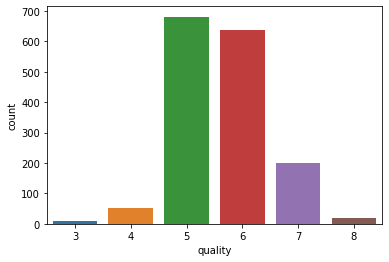

In [9]:
sns.countplot(wine['quality'])
plt.show()

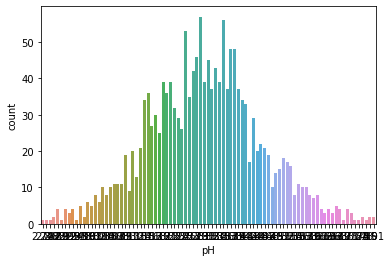

In [10]:
sns.countplot(wine['pH'])
plt.show()

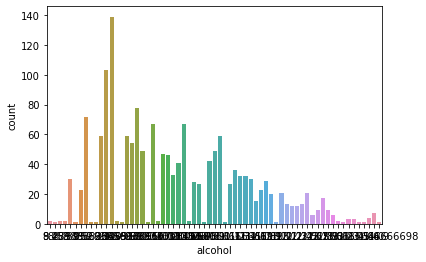

In [11]:
sns.countplot(wine['alcohol'])
plt.show()

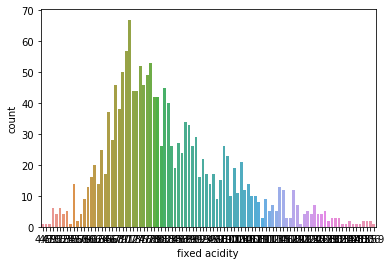

In [12]:
sns.countplot(wine['fixed acidity'])
plt.show()

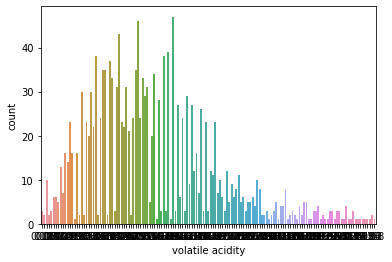

In [13]:
sns.countplot(wine['volatile acidity'])
plt.show()

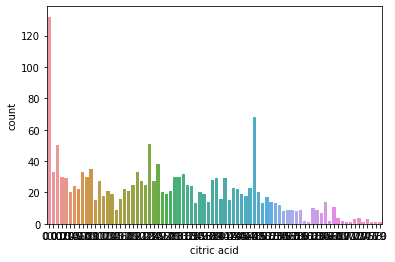

In [14]:
sns.countplot(wine['citric acid'])
plt.show()

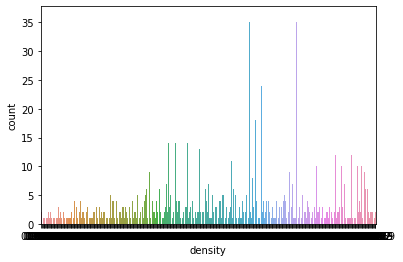

In [15]:
sns.countplot(wine['density'])
plt.show()

# Distplot:

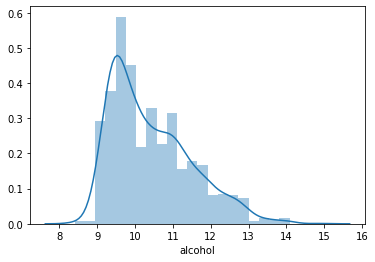

In [16]:
sns.distplot(wine['alcohol'])

fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

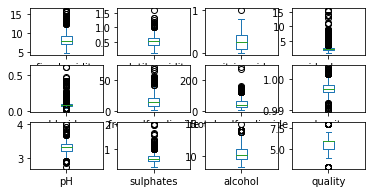

In [17]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002164C57E908>,
      dtype=object)

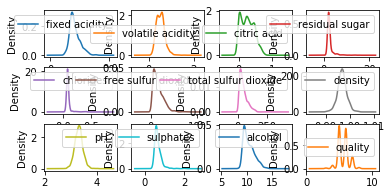

In [18]:

wine.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

# Histogram

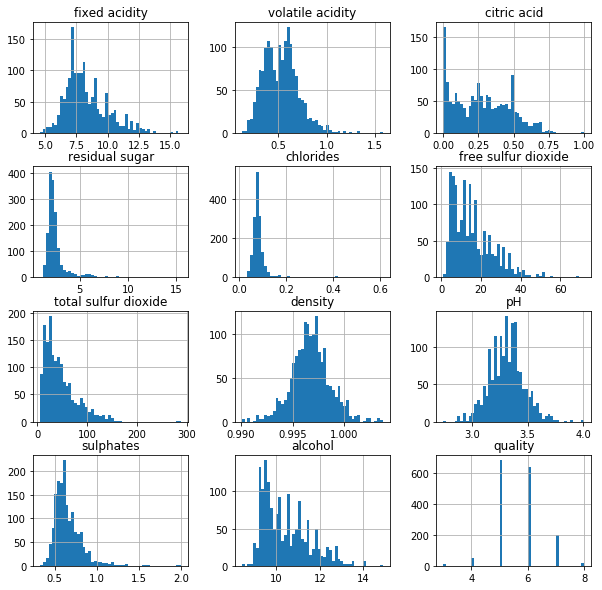

In [19]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

In [20]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [21]:
# See proportion of good vs bad wines
wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [22]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [23]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

# Splitting Dataset

In [24]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

In [25]:
#Feature Importance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07745463 0.10096011 0.09283724 0.07468203 0.06663212 0.07142969
 0.08347754 0.08407564 0.06828341 0.10804143 0.17212617]


# Logistic Regression Model 

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred_LR = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_LR))

Accuracy Score: 0.871875


In [31]:
confusion_mat = confusion_matrix(Y_test,Y_pred_LR)
print(confusion_mat)

[[264  15]
 [ 26  15]]


# Precision, F1 score, and Recall

In [32]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_LR, target_names=['Good', 'Not Good']))

              precision    recall  f1-score   support

        Good       0.91      0.95      0.93       279
    Not Good       0.50      0.37      0.42        41

    accuracy                           0.87       320
   macro avg       0.71      0.66      0.68       320
weighted avg       0.86      0.87      0.86       320



In [33]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# Applying NB classifier.
#Naive = naive_bayes.MultinomialNB()
nb = MultinomialNB()
nb.fit(X_train, Y_train)
Y_pred_NB = nb.predict(X_test)


In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred_NB))

Accuracy Score: 0.646875


In [35]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_NB, target_names=['Good', 'Not Good']))

              precision    recall  f1-score   support

        Good       0.93      0.65      0.76       279
    Not Good       0.21      0.66      0.32        41

    accuracy                           0.65       320
   macro avg       0.57      0.65      0.54       320
weighted avg       0.84      0.65      0.71       320



# Decision Tree classifier


In [37]:
# Applying Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
dtree.fit(X_train,Y_train)
predictions_DT=dtree.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,predictions_DT))

Accuracy Score: 0.871875


In [39]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions_DT, target_names=['Good', 'Not Good']))

              precision    recall  f1-score   support

        Good       0.90      0.95      0.93       279
    Not Good       0.50      0.32      0.39        41

    accuracy                           0.87       320
   macro avg       0.70      0.64      0.66       320
weighted avg       0.85      0.87      0.86       320



In [40]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=1,random_state=101,max_features=None,min_samples_leaf=30)
rfm.fit(X_train,Y_train)
predictions_RF=rfm.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,predictions_RF))

Accuracy Score: 0.890625


In [42]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions_RF, target_names=['Good', 'Not Good']))

              precision    recall  f1-score   support

        Good       0.91      0.96      0.94       279
    Not Good       0.62      0.39      0.48        41

    accuracy                           0.89       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.88      0.89      0.88       320



In [43]:
# Applying support vector machine algorithm.
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,Y_train)
predictions_SVM = SVM.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,predictions_SVM))

Accuracy Score: 0.871875


In [45]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions_SVM, target_names=['Good', 'Not Good']))

              precision    recall  f1-score   support

        Good       0.87      1.00      0.93       279
    Not Good       0.00      0.00      0.00        41

    accuracy                           0.87       320
   macro avg       0.44      0.50      0.47       320
weighted avg       0.76      0.87      0.81       320



# Using KNN:

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred_KNN= model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred_KNN))

Accuracy Score: 0.8875


In [47]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_KNN, target_names=['Good', 'Not Good']))

              precision    recall  f1-score   support

        Good       0.92      0.95      0.94       279
    Not Good       0.58      0.44      0.50        41

    accuracy                           0.89       320
   macro avg       0.75      0.70      0.72       320
weighted avg       0.88      0.89      0.88       320



# Using GaussianNB:

In [48]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3_GNB = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3_GNB))

Accuracy Score: 0.840625


In [49]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred3_GNB, target_names=['Good', 'Not Good']))

              precision    recall  f1-score   support

        Good       0.96      0.86      0.90       279
    Not Good       0.43      0.73      0.54        41

    accuracy                           0.84       320
   macro avg       0.69      0.79      0.72       320
weighted avg       0.89      0.84      0.86       320



# Using Xgboost:

In [52]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5_XG = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5_XG))

Accuracy Score: 0.8875


In [51]:
!pip install xgboost

   ---------------------------------------- 125.4/125.4 MB 3.8 MB/s eta 0:00:00


In [54]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_pred5_XG, target_names=['Good', 'Not Good']))

              precision    recall  f1-score   support

        Good       0.95      0.92      0.93       279
    Not Good       0.55      0.66      0.60        41

    accuracy                           0.89       320
   macro avg       0.75      0.79      0.77       320
weighted avg       0.90      0.89      0.89       320



In [56]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Multinomial Naive Bayes','KNN', 'SVM','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.871875,0.646875,0.8875,0.871875,0.871875,0.840625,0.890625,0.8875]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.890625,Random Forest
0.887500,KNN
0.887500,Xgboost
0.871875,Logistic Regression
0.871875,SVM
0.871875,Decision Tree
0.840625,GaussianNB
0.646875,Multinomial Naive Bayes


In [ ]:
Random Forest achieves highest accuracy.So it can be used for training the model.